---
title: MNIST Manifold
---

The MNIST data live in a fairly small number of dimensions as shown with a simple PCA exercise. 

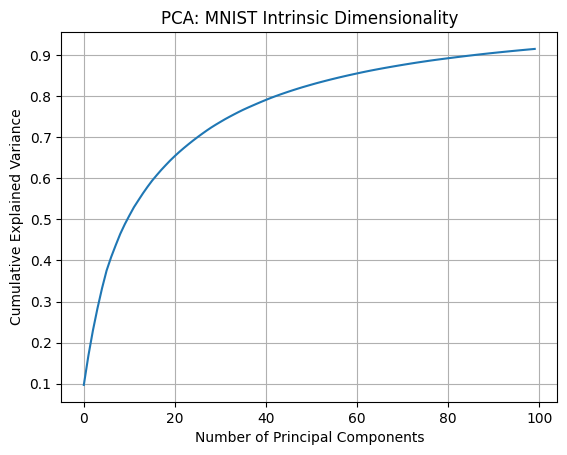

In [2]:
from sklearn.decomposition import PCA
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import torch

# Load MNIST
transform = transforms.ToTensor()
mnist = MNIST(root='./data', train=True, transform=transform, download=True)

X = torch.stack([img for img, _ in mnist]).view(-1, 28*28).numpy()

# Apply PCA
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

# Plot explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: MNIST Intrinsic Dimensionality')
plt.grid(True)
plt.show()


We can visualize the manifold the digits lie on as well with UMAP. 

/workspaces/engineering-ai-agents/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


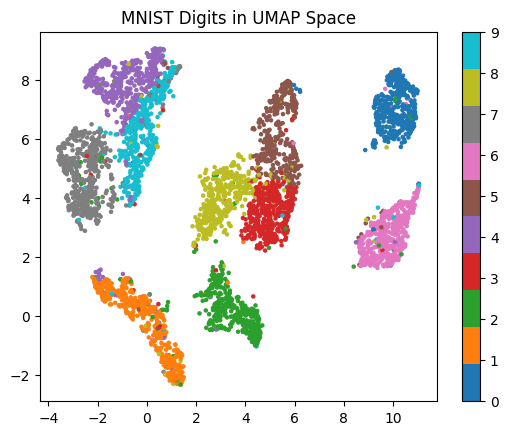

In [3]:
import umap.umap_ as umap

# Reduce to 2D using UMAP
X_2d = umap.UMAP(n_components=2).fit_transform(X[:5000])
y = [label for _, label in mnist][:5000]

# Plot
plt.scatter(X_2d[:,0], X_2d[:,1], c=y, cmap='tab10', s=5)
plt.colorbar()
plt.title("MNIST Digits in UMAP Space")
plt.show()
